In [44]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from ggplot import *

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/shaoqiantang/movie-data-analysis/master/movie.csv', encoding = 'iso-8859-1')
data.head()

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [4]:
data.dtypes

Day_of_Week          object
Director             object
Genre                object
Movie_Title          object
Release_Date         object
Studio               object
Adjusted_Gross       object
Budget              float64
Gross_rev            object
IMDb_Rating         float64
MovieLens_Rating    float64
Overseas_rev         object
Overseas_Perc       float64
Profit               object
Profit_perc         float64
Runtime_min           int64
US_rev              float64
US_perc             float64
dtype: object

In [5]:
# convert object to float data
object_cols = ['Gross_rev', 'Overseas_rev', 'Profit','Adjusted_Gross']
for col in object_cols:
    data[col] = data[col].str.replace(',','')
    data[col] = pd.to_numeric(data[col])
data.dtypes

Day_of_Week          object
Director             object
Genre                object
Movie_Title          object
Release_Date         object
Studio               object
Adjusted_Gross      float64
Budget              float64
Gross_rev           float64
IMDb_Rating         float64
MovieLens_Rating    float64
Overseas_rev        float64
Overseas_Perc       float64
Profit              float64
Profit_perc         float64
Runtime_min           int64
US_rev              float64
US_perc             float64
dtype: object

In [6]:
Genre = ["action","adventure","animation","comedy","drama"]
data = data[data['Genre'].isin(Genre)]
data

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126.0,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/2/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7


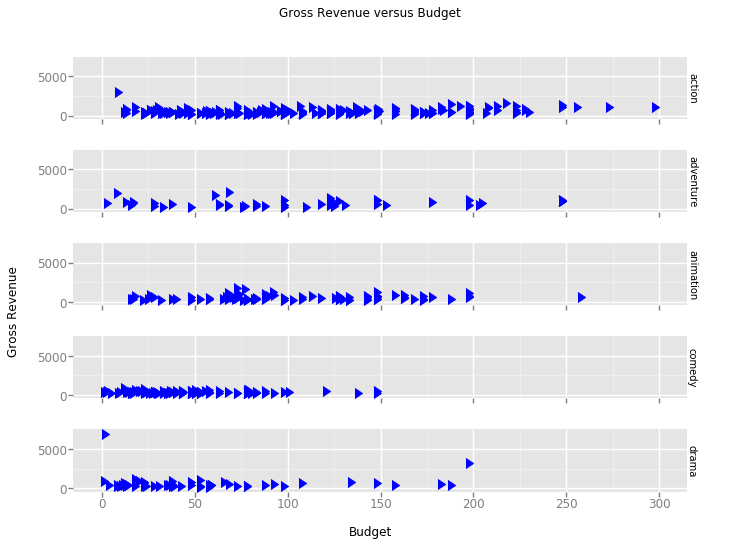

<ggplot: (-9223372029293618446)>

In [39]:
# Create a faceted plot in ggplot of a public data set use size, shape and color as well as facets.
p = ggplot(data, aes(x = 'Budget', y ='Adjusted_Gross')) + geom_point(shape = 5, color= 'blue', size = 100) + facet_grid('Genre') 
p + ylab('Gross Revenue')+ ggtitle('Gross Revenue versus Budget')

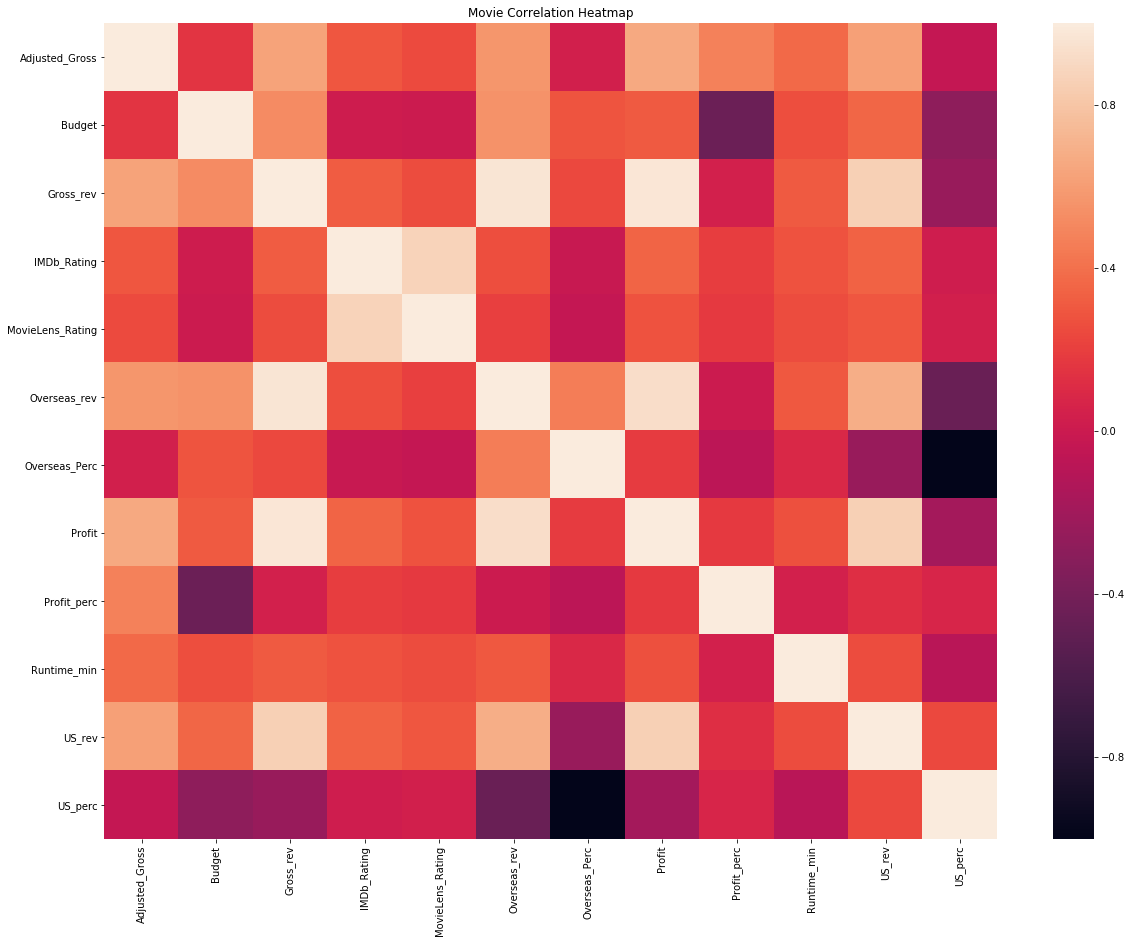

In [43]:
# Create a Correlation Heatmap in Seaborn using a public dataset.
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Movie Correlation Heatmap")
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [45]:
# Create your own Test and Training sets using a public dataset.
x_train ,x_test = train_test_split(data,test_size=0.3)
x_train.head()

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc
285,Friday,Rupert Sanders,action,Snow White and the Huntsman,1/6/2012,Universal,410.8,170.0,396.6,6.1,2.99,241.3,60.8,226.6,133.3,127,155.3,39.2
444,Friday,Chris Columbus,comedy,Home Alone 2: Lost in New York,20/11/1992,Fox,608.5,20.0,359.0,6.5,2.52,185.4,51.6,339.0,1695.0,120,173.6,48.4
458,Friday,Marc Forster,action,Quantum of Solace,14/11/2008,Sony,647.4,230.0,586.1,6.7,3.38,417.7,71.3,356.1,154.8,106,168.4,28.7
147,Thursday,Michael Patrick King,comedy,Sex and the City 2,27/05/2010,WB/New Line,314.4,95.0,288.3,4.2,2.32,193.0,66.9,193.3,203.5,146,95.3,33.1
128,Wednesday,Roland Emmerich,action,The Patriot,28/06/2000,Sony,297.3,110.0,215.3,6.1,3.22,102.0,47.4,105.3,95.7,165,113.3,52.6


In [46]:
x_test.head()

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc
463,Friday,Alan Taylor,action,Thor: The Dark World,8/11/2013,Buena Vista Studios,658.2,170.0,644.8,7.1,3.51,438.4,68.0,474.8,279.3,112,206.4,32.0
197,Friday,David Dobkin,comedy,Wedding Crashers,15/07/2005,New Line Cinema,347.3,40.0,285.2,7.0,3.54,75.9,26.6,245.2,613.0,119,209.3,73.4
189,Friday,Wes Ball,action,The Maze Runner,19/09/2014,Fox,342.3,34.0,340.8,6.9,3.38,238.3,69.9,306.8,902.4,113,102.4,30.1
100,Friday,"Cody Cameron, Kris Pearn",animation,Cloudy with a Chance of Meatballs 2,27/09/2013,Sony,280.0,78.0,274.3,6.5,3.21,154.5,56.3,196.3,251.7,95,119.8,43.7
311,Wednesday,Renny Harlin,action,Die Hard 2: Die Harder,4/7/1990,Fox,436.7,70.0,240.0,7.1,3.42,122.5,51.0,170.0,242.9,124,117.5,49.0
